In [168]:
# Import das Bibliotecas

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.impute import SimpleImputer
import plotly.express as px
from geopy.geocoders import Nominatim
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [178]:
# Função para leitura dos arquivos
def ler_arquivo(caminho_arquivo):
    try:
        if caminho_arquivo.endswith('.csv'):
            # Especifique a codificação ao ler o arquivo CSV
            leitor_csv = pd.read_csv(caminho_arquivo, encoding='utf-8')
            return leitor_csv
        elif caminho_arquivo.endswith('.xlsx'):
            conteudo_xlsx = pd.read_excel(caminho_arquivo)
            return conteudo_xlsx
        else:
            with open(caminho_arquivo, 'r') as arquivo:
                conteudo = arquivo.read()
            return conteudo
    except FileNotFoundError:
        return f"O arquivo '{caminho_arquivo}' não foi encontrado."
    except Exception as e:
        return f"Ocorreu um erro ao ler o arquivo: {e}"

# Exemplo de uso para CSV
caminho_csv = './datasets/SuperStoreOrders.csv'


In [170]:
df = ler_arquivo(caminho_csv)


In [171]:
# Ler as 5 primeiras linhas dataset

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [172]:
# Renomear as colunas do dataset

df = df.rename(columns={
    'order_id': 'id_pedido',
    'order_date': 'data_pedido',
    'ship_date': 'data_envio',
    'ship_mode': 'modo_envio',
    'customer_name': 'nome_cliente',
    'segment': 'segmento',
    'state': 'estado',
    'country': 'país',
    'market': 'mercado',
    'region': 'região',
    'product_id': 'produto_id' ,
    'category': 'categoria',
    'sub_category': 'subcategoria',
    'product_name': 'nome_produto',
    'sales': 'vendas',
    'quantity': 'quantidade',
    'discount': 'desconto',
    'profit': 'lucro',
    'shipping_cost': 'custo_envio',
    'order_priority': 'prioridade_pedido',
    'year': 'ano'
})

In [173]:
df.columns

Index(['id_pedido', 'data_pedido', 'data_envio', 'modo_envio', 'nome_cliente',
       'segmento', 'estado', 'país', 'mercado', 'região', 'produto_id',
       'categoria', 'subcategoria', 'nome_produto', 'vendas', 'quantidade',
       'desconto', 'lucro', 'custo_envio', 'prioridade_pedido', 'ano'],
      dtype='object')

In [174]:
# Verificar se ha dados duplicados dataset

print(f'Ha dados duplicados no dataset: \n {df[df.duplicated()]}')

Ha dados duplicados no dataset: 
 Empty DataFrame
Columns: [id_pedido, data_pedido, data_envio, modo_envio, nome_cliente, segmento, estado, país, mercado, região, produto_id, categoria, subcategoria, nome_produto, vendas, quantidade, desconto, lucro, custo_envio, prioridade_pedido, ano]
Index: []

[0 rows x 21 columns]


In [175]:
# Verificar se ha valores ausentes no Dataset

table = PrettyTable()

table.field_names = ['Nome_Coluna', 'Tipo_Dados', '%Valores_Missing']

for column in df.columns:
  tipo_dados = str(df[column].dtype)
  valores_missing = 100-df[column].count()/ df.shape[0]*100

  table.add_row([column, tipo_dados, valores_missing])

print(table)

+-------------------+------------+------------------+
|    Nome_Coluna    | Tipo_Dados | %Valores_Missing |
+-------------------+------------+------------------+
|     id_pedido     |   object   |       0.0        |
|    data_pedido    |   object   |       0.0        |
|     data_envio    |   object   |       0.0        |
|     modo_envio    |   object   |       0.0        |
|    nome_cliente   |   object   |       0.0        |
|      segmento     |   object   |       0.0        |
|       estado      |   object   |       0.0        |
|        país       |   object   |       0.0        |
|      mercado      |   object   |       0.0        |
|       região      |   object   |       0.0        |
|     produto_id    |   object   |       0.0        |
|     categoria     |   object   |       0.0        |
|    subcategoria   |   object   |       0.0        |
|    nome_produto   |   object   |       0.0        |
|       vendas      |   object   |       0.0        |
|     quantidade    |   int6

In [176]:
# Transformar a coluna vendas em float

df['vendas'] = df['vendas'].replace('[\$,]', '', regex=True).astype(float)

In [177]:
df.describe()

,vendas,quantidade,desconto,lucro,custo_envio,ano
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208
std,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


### Vendas (vendas):

### A média de vendas por pedido é de aproximadamente 246.50.
### O valor mínimo de vendas é 0, indicando que há pedidos sem vendas registradas.
### O valor máximo de vendas é 22,638.


### Quantidade (quantidade):

### A média de quantidade de produtos em cada pedido é aproximadamente 3.48.
### A quantidade varia de 1 a 14 itens em um pedido.
### A maioria dos pedidos (75%) contém até 5 itens.

### Desconto (desconto):

### A média de desconto aplicado nos pedidos é cerca de 14.29%.
### A maioria dos pedidos (50%) não tem desconto.
### O desconto máximo aplicado é de 85%.

### Lucro (lucro):

### A média de lucro por pedido é aproximadamente  28.64.
### O lucro varia de -6599.98 a 8399.98.
### A mediana (50%) do lucro é de 9.24, o que sugere que há uma variação considerável nos lucros.

### Custo de Envio (custo_envio):

### A média do custo de envio é de 26.38.
### O custo de envio varia de 0 a 933.57.
### A maioria dos pedidos (75%) tem um custo de envio de até 24.45.

### Ano (ano):

### A média indica que há dados para aproximadamente 2012.78.
### O conjunto de dados abrange os anos de 2011 a 2014.

In [137]:
# Quais são os produtos mais vendidos em termos de quantidade e receita?



# Agrupe por nome do produto e calcule a quantidade total e a receita total
produtos_mais_vendidos_quantidade = df.groupby('nome_produto')['quantidade'].sum().reset_index()
produtos_mais_vendidos_receita = df.groupby('nome_produto')['vendas'].sum().reset_index()

# Ordene os DataFrames resultantes em ordem decrescente
produtos_mais_vendidos_quantidade = produtos_mais_vendidos_quantidade.sort_values(by='quantidade', ascending=False)
produtos_mais_vendidos_receita = produtos_mais_vendidos_receita.sort_values(by='vendas', ascending=False)

In [138]:
print("\nProdutos mais vendidos em termos de quantidade:")
produtos_mais_vendidos_quantidade.head(10)


Produtos mais vendidos em termos de quantidade:


,nome_produto,quantidade
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


In [139]:
print("\nProdutos mais vendidos em termos de receita:")
produtos_mais_vendidos_receita.head(10)


Produtos mais vendidos em termos de receita:


,nome_produto,vendas
310,"Apple Smart Phone, Full Size",86936.0
970,"Cisco Smart Phone, Full Size",76441.0
2415,"Motorola Smart Phone, Full Size",73159.0
2501,"Nokia Smart Phone, Full Size",71904.0
866,Canon imageCLASS 2200 Advanced Copier,61600.0
1837,"Hon Executive Leather Armchair, Adjustable",58200.0
2631,"Office Star Executive Leather Armchair, Adjust...",50667.0
1714,"Harbour Creations Executive Leather Armchair, ...",50120.0
2988,"Samsung Smart Phone, Cordless",48654.0
2502,"Nokia Smart Phone, with Caller ID",47880.0


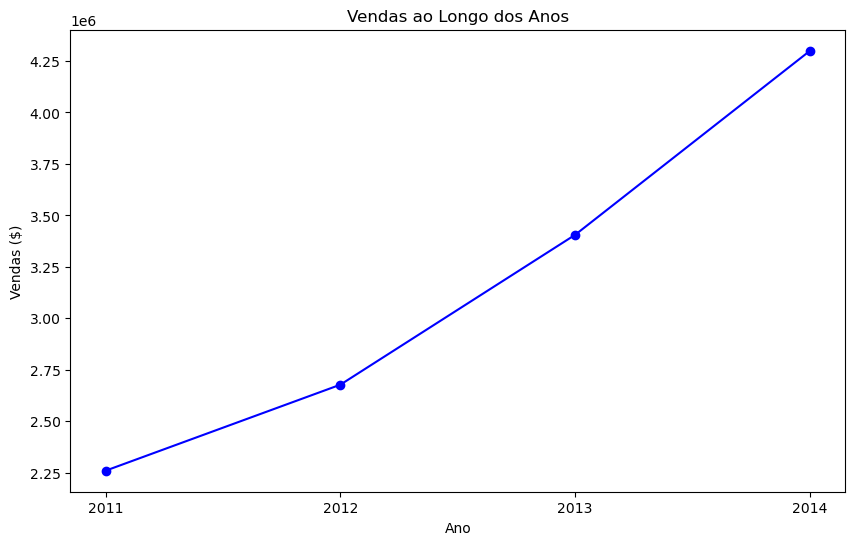

In [140]:
# Como as vendas variam ao longo dos anos?

# Agrupe os dados por ano e calcule as vendas totais por ano
vendas_por_ano = df.groupby('ano')['vendas'].sum().reset_index()

# Crie um gráfico de linha para visualizar as vendas ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(vendas_por_ano['ano'], vendas_por_ano['vendas'], marker='o', linestyle='-', color='b')
plt.title('Vendas ao Longo dos Anos')
# Defina os ticks do eixo x para exibir apenas os anos inteiros
plt.xticks(vendas_por_ano['ano'])
plt.xlabel('Ano')
plt.ylabel('Vendas ($)')
plt.grid(False)
plt.show()

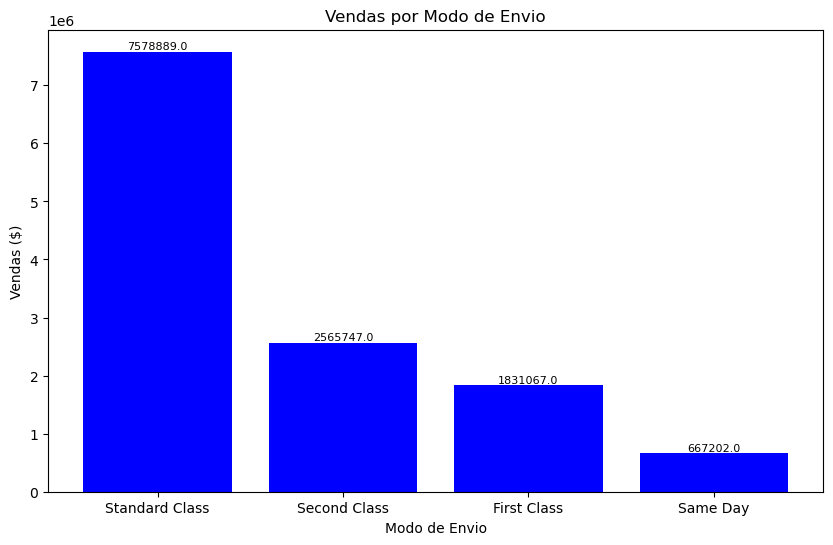

In [141]:
# Qual é o impacto dos diferentes modos de envio no volume de vendas?

# Agrupe os dados por modo de envio e calcule as vendas totais por modo de envio
vendas_por_modo_envio = df.groupby('modo_envio')['vendas'].sum().reset_index()

# Ordene o DataFrame em ordem decrescente com base nas vendas
vendas_por_modo_envio = vendas_por_modo_envio.sort_values(by='vendas', ascending=False)

# Crie um gráfico de barras para visualizar as vendas por modo de envio
plt.figure(figsize=(10, 6))
barras = plt.bar(vendas_por_modo_envio['modo_envio'], vendas_por_modo_envio['vendas'], color='b')
plt.title('Vendas por Modo de Envio')
plt.xlabel('Modo de Envio')
plt.ylabel('Vendas ($)')

# Adicione os valores nas barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.grid(False)
plt.show()


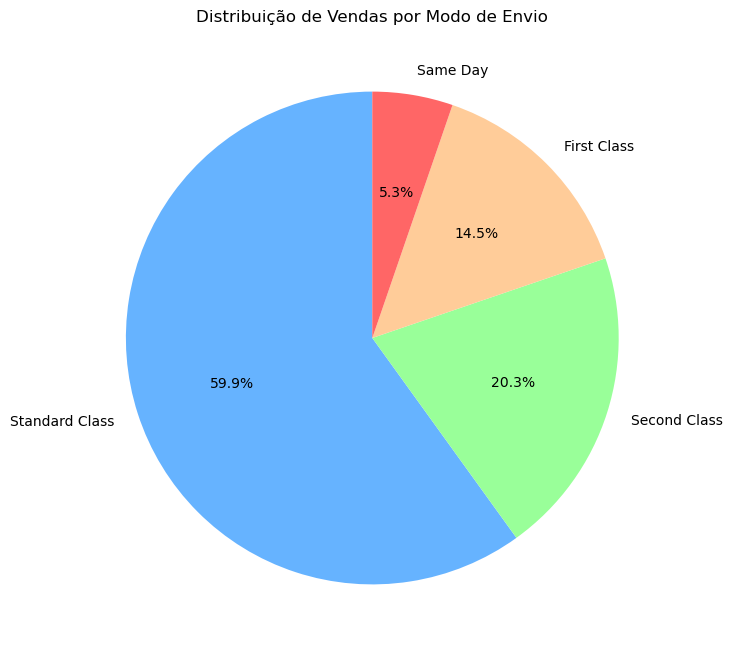

In [142]:
plt.figure(figsize=(8, 8))
plt.pie(vendas_por_modo_envio['vendas'], labels=vendas_por_modo_envio['modo_envio'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])
plt.title('Distribuição de Vendas por Modo de Envio')
plt.show()

In [143]:
# Qual é a rentabilidade média por pedido e por produto?

# Calcula a rentabilidade por pedido
df['rentabilidade_pedido'] = df['lucro'] / df['quantidade']

# Agrupa os dados por número do pedido e calcula a rentabilidade média por pedido
rentabilidade_media_por_pedido = df.groupby('id_pedido')['rentabilidade_pedido'].mean().reset_index()

# Calcula a rentabilidade média por produto
rentabilidade_media_por_produto = df.groupby('nome_produto')['rentabilidade_pedido'].mean().reset_index()

# Calcula a rentabilidade média global
rentabilidade_media_global = df['rentabilidade_pedido'].mean()

print(f"Rentabilidade Média por Pedido: {rentabilidade_media_global:.2f}")


Rentabilidade Média por Pedido: 8.13


In [144]:
print("\nTop 10 Produtos por Rentabilidade Média:")
rentabilidade_media_por_produto.sort_values(by='rentabilidade_pedido', ascending=False).head(10)


Top 10 Produtos por Rentabilidade Média:


,nome_produto,rentabilidade_pedido
866,Canon imageCLASS 2200 Advanced Copier,1259.996400
867,Canon imageCLASS MF7460 Monochrome Digital Las...,997.995000
3778,Zebra ZM400 Thermal Label Printer,557.256000
326,Ativa V4110MDD Micro-Cut Shredder,342.995100
18,"3D Systems Cube Printer, 2nd Generation, Magenta",337.997400
1784,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,333.641000
1429,Fellowes PB500 Electric Punch Plastic Comb Bin...,330.457400
1974,Ibico EPK-21 Electric Binding System,296.098433
1647,HP Designjet T520 Inkjet Large Format Printer ...,268.331800
854,Canon PC1060 Personal Laser Copier,223.996800


In [145]:
# Quais produtos ou categorias têm margens de lucro mais altas e mais baixas?

# Calcula a margem de lucro por pedido
df['margem_lucro'] = (df['lucro'] / df['vendas']) * 100

# Agrupa os dados por produto e calcula a margem de lucro média por produto
margem_lucro_por_produto = df.groupby('nome_produto')['margem_lucro'].mean().reset_index()

# Agrupa os dados por categoria e calcula a margem de lucro média por categoria
margem_lucro_por_categoria = df.groupby('categoria')['margem_lucro'].mean().reset_index()

print("\nTop 10 Produtos com Maior Margem de Lucro Média:")
margem_lucro_por_produto.sort_values(by='margem_lucro', ascending=False).head(10)




Top 10 Produtos com Maior Margem de Lucro Média:


,nome_produto,margem_lucro
3707,Xerox 20,51.840000
346,Avery 475,50.359706
867,Canon imageCLASS MF7460 Monochrome Digital Las...,49.999749
3587,Xerox 1890,49.938776
3457,Tops Green Bar Computer Printout Paper,49.938776
178,Adams Telephone Message Book w/Frequently-Call...,49.875000
3734,Xerox 223,49.850526
3233,Southworth Structures Collection,49.798574
3729,Xerox 219,49.169077
3358,"Strathmore #10 Envelopes, Ultimate White",49.059869


In [146]:
print("\nTop 10 Produtos com Menor Margem de Lucro Média:")
margem_lucro_por_produto.sort_values(by='margem_lucro').head(10)




Top 10 Produtos com Menor Margem de Lucro Média:


,nome_produto,margem_lucro
930,"Chromcraft Training Table, Adjustable Height",-230.884211
1368,Eureka Disposable Bags for Sanitaire Vibra Gro...,-223.300000
803,"Bush Westfield Collection Bookcases, Dark Cher...",-209.727692
1909,Hoover Commercial Lightweight Upright Vacuum,-184.235294
1376,Euro Pro Shark Stick Mini Vacuum,-177.331272
1818,"Hon Coffee Table, Fully Assembled",-176.191157
913,"Chromcraft Coffee Table, Fully Assembled",-174.870962
2204,"Lesro Coffee Table, Rectangular",-148.965357
16,3.6 Cubic Foot Counter Height Office Refrigerator,-148.199129
2649,Okidata B401 Printer,-139.993000


In [147]:
print("\nCategorias com Maior Margem de Lucro Média:")
margem_lucro_por_categoria.sort_values(by='margem_lucro', ascending=False)





Categorias com Maior Margem de Lucro Média:


,categoria,margem_lucro
2,Technology,4.965838
0,Furniture,0.874818
1,Office Supplies,NaN


In [148]:
# Cria um gráfico de pizza interativo com as top categorias
fig = px.pie(margem_lucro_por_categoria, values='margem_lucro', names='categoria',
             title='Margens de Lucro Médias',
             labels={'margem_lucro': 'Margem de Lucro Média (%)'})

# Exibe o gráfico
fig.show()

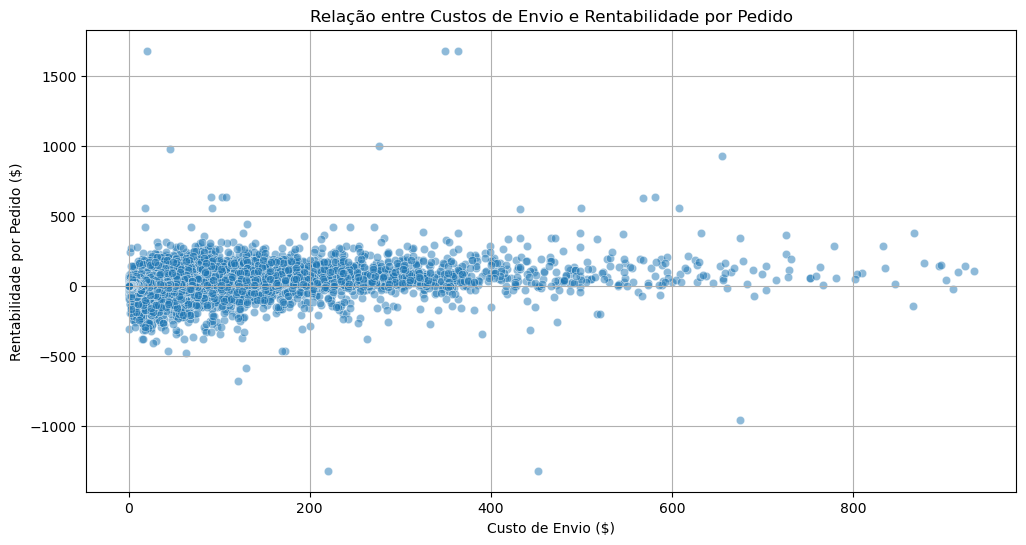

Correlação entre Custos de Envio e Rentabilidade: 0.30


In [149]:
# Como os custos de envio impactam a rentabilidade?

# Calcula a rentabilidade por pedido
df['rentabilidade_pedido'] = df['lucro'] / df['quantidade']

# Cria um gráfico de dispersão entre custos de envio e rentabilidade
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='custo_envio', y='rentabilidade_pedido', alpha=0.5)
plt.title('Relação entre Custos de Envio e Rentabilidade por Pedido')
plt.xlabel('Custo de Envio ($)')
plt.ylabel('Rentabilidade por Pedido ($)')
plt.grid(True)
plt.show()

# Calcula a correlação entre custos de envio e rentabilidade
correlacao_custo_rentabilidade = df['custo_envio'].corr(df['rentabilidade_pedido'])
print(f"Correlação entre Custos de Envio e Rentabilidade: {correlacao_custo_rentabilidade:.2f}")

### O valor de 0.30 sugere uma correlação moderada positiva. Isso significa que, em geral, à medida que os custos de envio aumentam, a rentabilidade tende a aumentar também

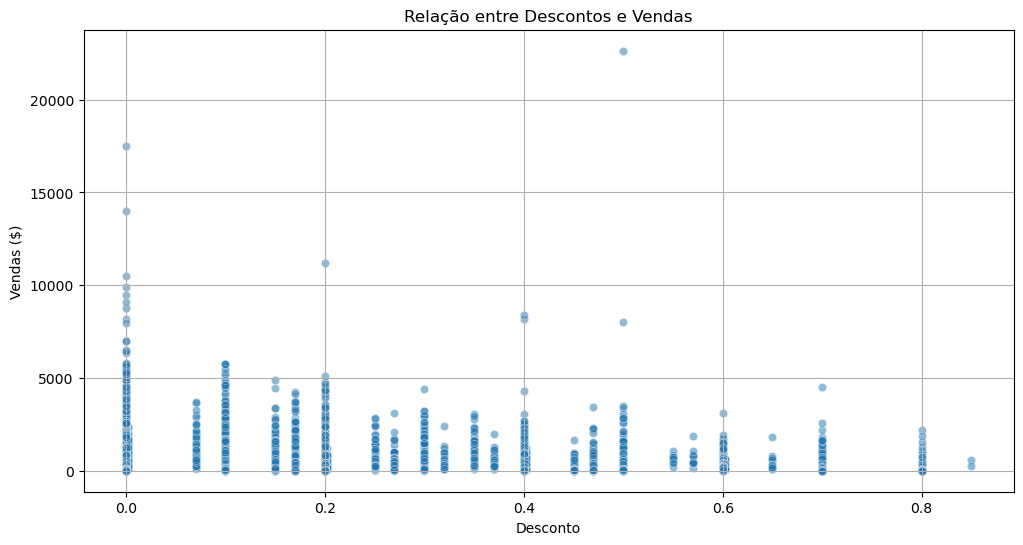

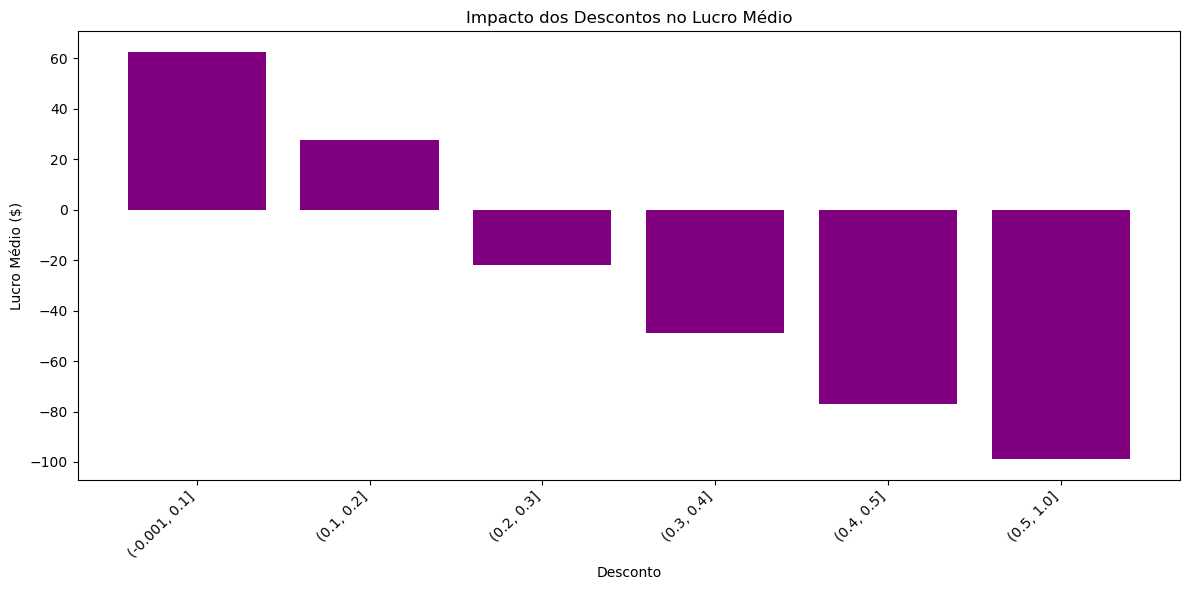

In [150]:
# Qual é o impacto dos descontos nas vendas e no lucro?

# Cria uma coluna adicional para representar os intervalos de desconto
df['intervalo_desconto'] = pd.cut(df['desconto'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0], include_lowest=True)

# Cria um gráfico de dispersão entre descontos e vendas
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='desconto', y='vendas', alpha=0.5)
plt.title('Relação entre Descontos e Vendas')
plt.xlabel('Desconto')
plt.ylabel('Vendas ($)')
plt.grid(True)
plt.show()

# Agrupa os dados por intervalos de desconto e calcula a média de vendas e lucro
impacto_desconto = df.groupby('intervalo_desconto').agg({'vendas': 'mean', 'lucro': 'mean'}).reset_index()

# Cria um gráfico de barras para mostrar o impacto dos descontos no lucro médio
plt.figure(figsize=(12, 6))
plt.bar(impacto_desconto['intervalo_desconto'].astype(str), impacto_desconto['lucro'], color='purple')
plt.title('Impacto dos Descontos no Lucro Médio')
plt.xlabel('Desconto')
plt.ylabel('Lucro Médio ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Podemos analisar visualmente como o aumento dos descontos afeta o lucro médio.
#### Observarmos que as barras estão diminuindo à medida que os descontos aumentam, isso indica que descontos mais altos estão associados a um lucro médio menor. O gráfico proporciona uma visão geral do impacto dos descontos no desempenho financeiro.

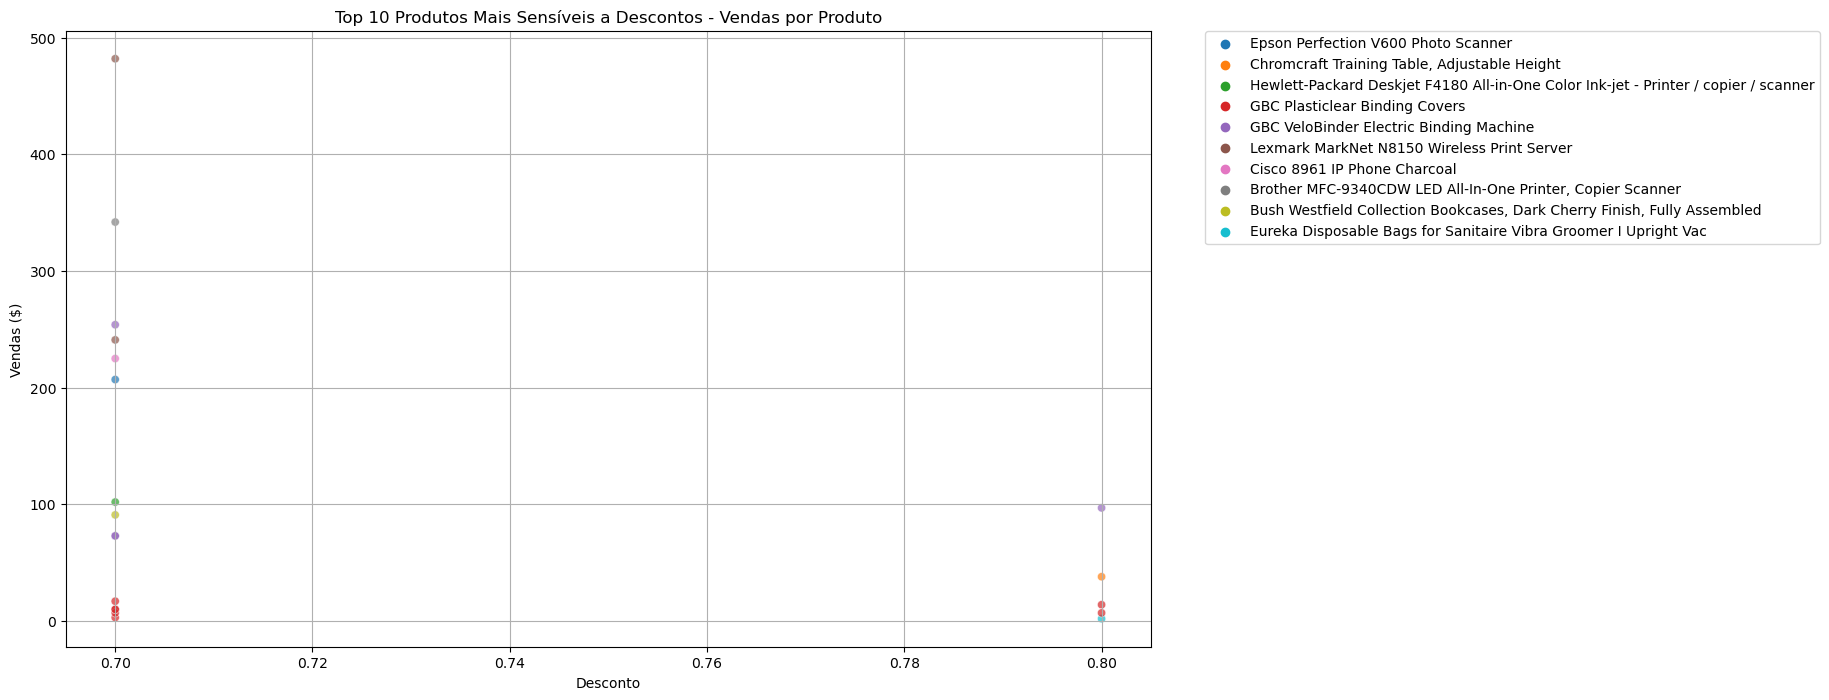

In [151]:
# Quais são os produtos mais sensíveis a descontos?

#Calcula a sensibilidade a descontos para cada produto
sensibilidade_descontos = df.groupby('nome_produto').agg({'desconto': 'mean', 'vendas': 'mean', 'lucro': 'mean'}).reset_index()

# Identifica os Top 10 Produtos Mais Sensíveis a Descontos
top_10_sensiveis_a_descontos = sensibilidade_descontos.nlargest(10, 'desconto')

# Cria um gráfico de dispersão para vendas e lucro dos Top 10 Produtos
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df[df['nome_produto'].isin(top_10_sensiveis_a_descontos['nome_produto'])],
                x='desconto', y='vendas', hue='nome_produto', alpha=0.7)
plt.title('Top 10 Produtos Mais Sensíveis a Descontos - Vendas por Produto')
plt.xlabel('Desconto')
plt.ylabel('Vendas ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

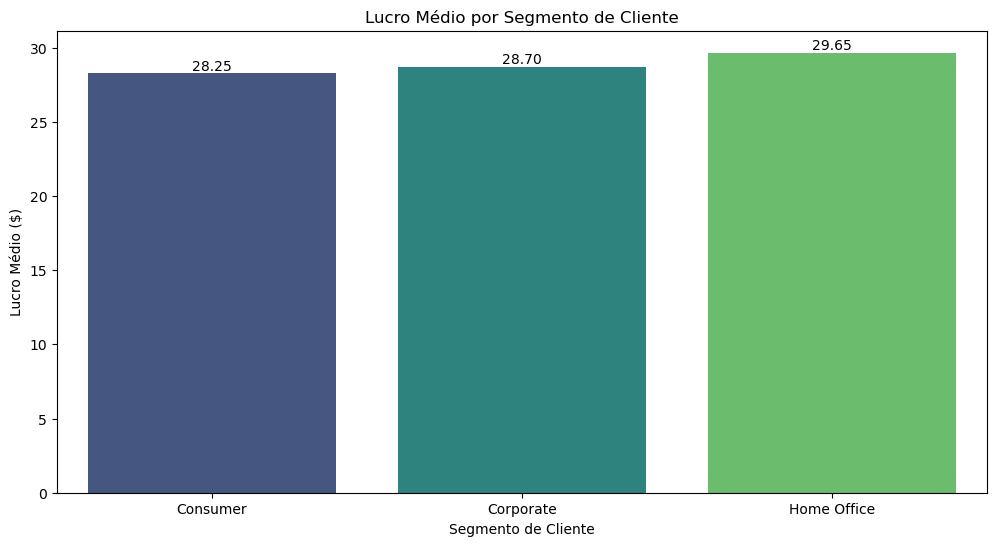

In [152]:
# Quais são os segmentos de clientes mais lucrativos?

lucro_por_segmento = df.groupby('segmento')['lucro'].mean().reset_index()


# Cria um gráfico de barras para visualizar o lucro médio por segmento de cliente
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='segmento', y='lucro', data=lucro_por_segmento, palette='viridis')

# Adiciona os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Lucro Médio por Segmento de Cliente')
plt.xlabel('Segmento de Cliente')
plt.ylabel('Lucro Médio ($)')
plt.show()

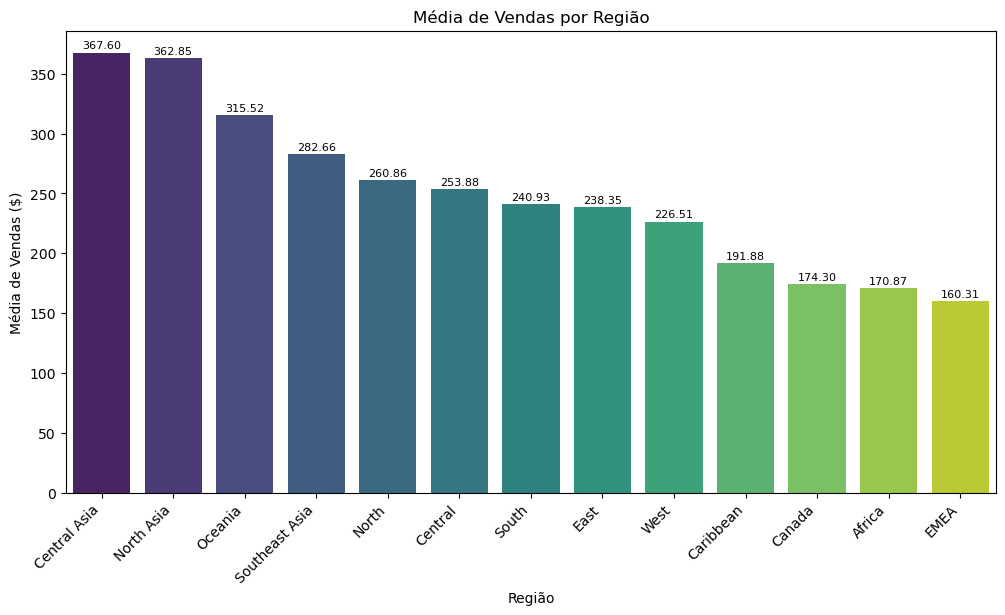

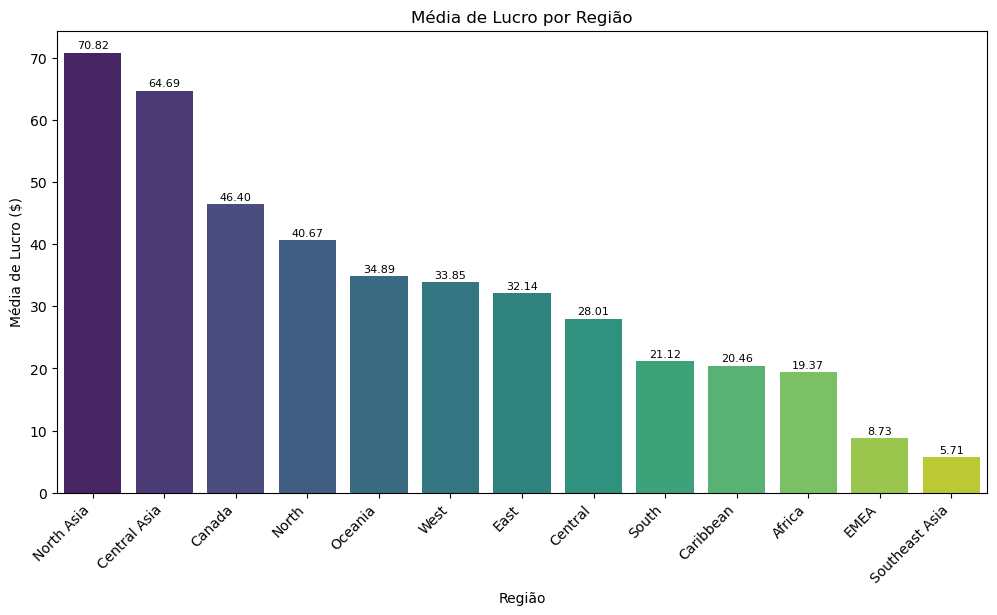

In [153]:
# Como o comportamento de compra varia entre diferentes regiões ou países? Media

# Calcula as médias para vendas
vendas_por_regiao = df.groupby('região').agg({'vendas': 'mean'}).reset_index().sort_values(by='vendas', ascending=False)

# Cria um gráfico de barras para comparar as médias de vendas por região
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='região', y='vendas', data=vendas_por_regiao, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.title('Média de Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Média de Vendas ($)')
plt.show()
# Calcula as médias para lucros
lucro_por_regiao = df.groupby('região').agg({'lucro': 'mean'}).reset_index().sort_values(by='lucro', ascending=False)

# Cria um gráfico de barras para comparar as médias de lucro por região
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='região', y='lucro', data=lucro_por_regiao, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.title('Média de Lucro por Região')
plt.xlabel('Região')
plt.ylabel('Média de Lucro ($)')
plt.show()


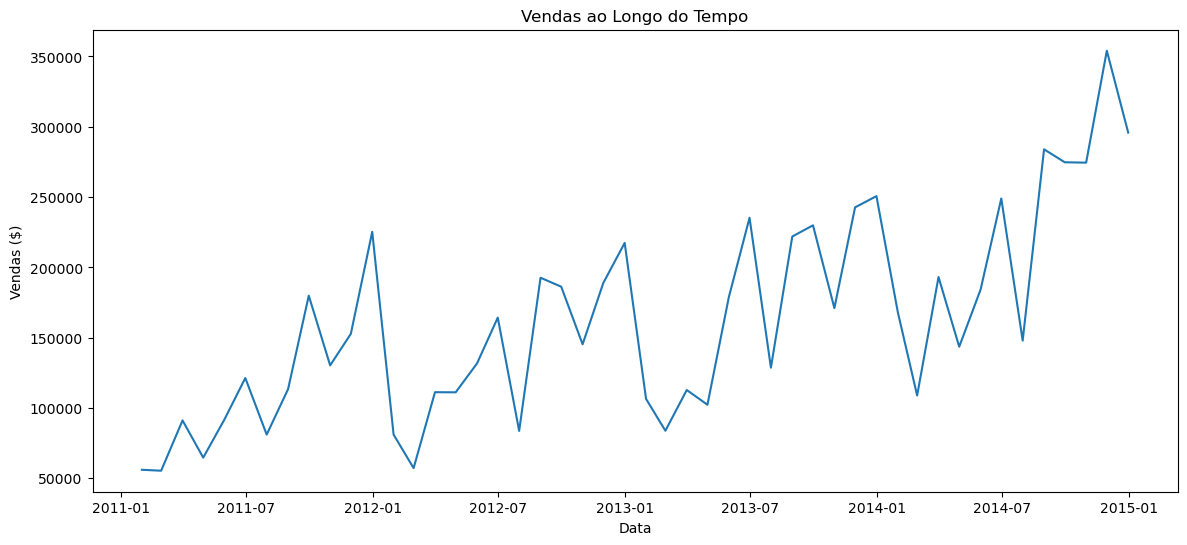

In [154]:
# Existe uma sazonalidade nas compras dos clientes?

# Certifique-se de que a coluna 'order_date' está no formato de data
df['data_pedido'] = pd.to_datetime(df['data_pedido'], errors='coerce', format='%d-%m-%Y')
df['data_pedido'] = pd.to_datetime(df['data_pedido'], errors='coerce', format='%m/%d/%Y')

# Agrupa as vendas por mês
vendas_por_mes = df.resample('M', on='data_pedido')['vendas'].sum().reset_index()

# Cria um gráfico de linhas para visualizar as vendas ao longo do tempo
plt.figure(figsize=(14, 6))
sns.lineplot(x='data_pedido', y='vendas', data=vendas_por_mes)
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas ($)')
plt.show()

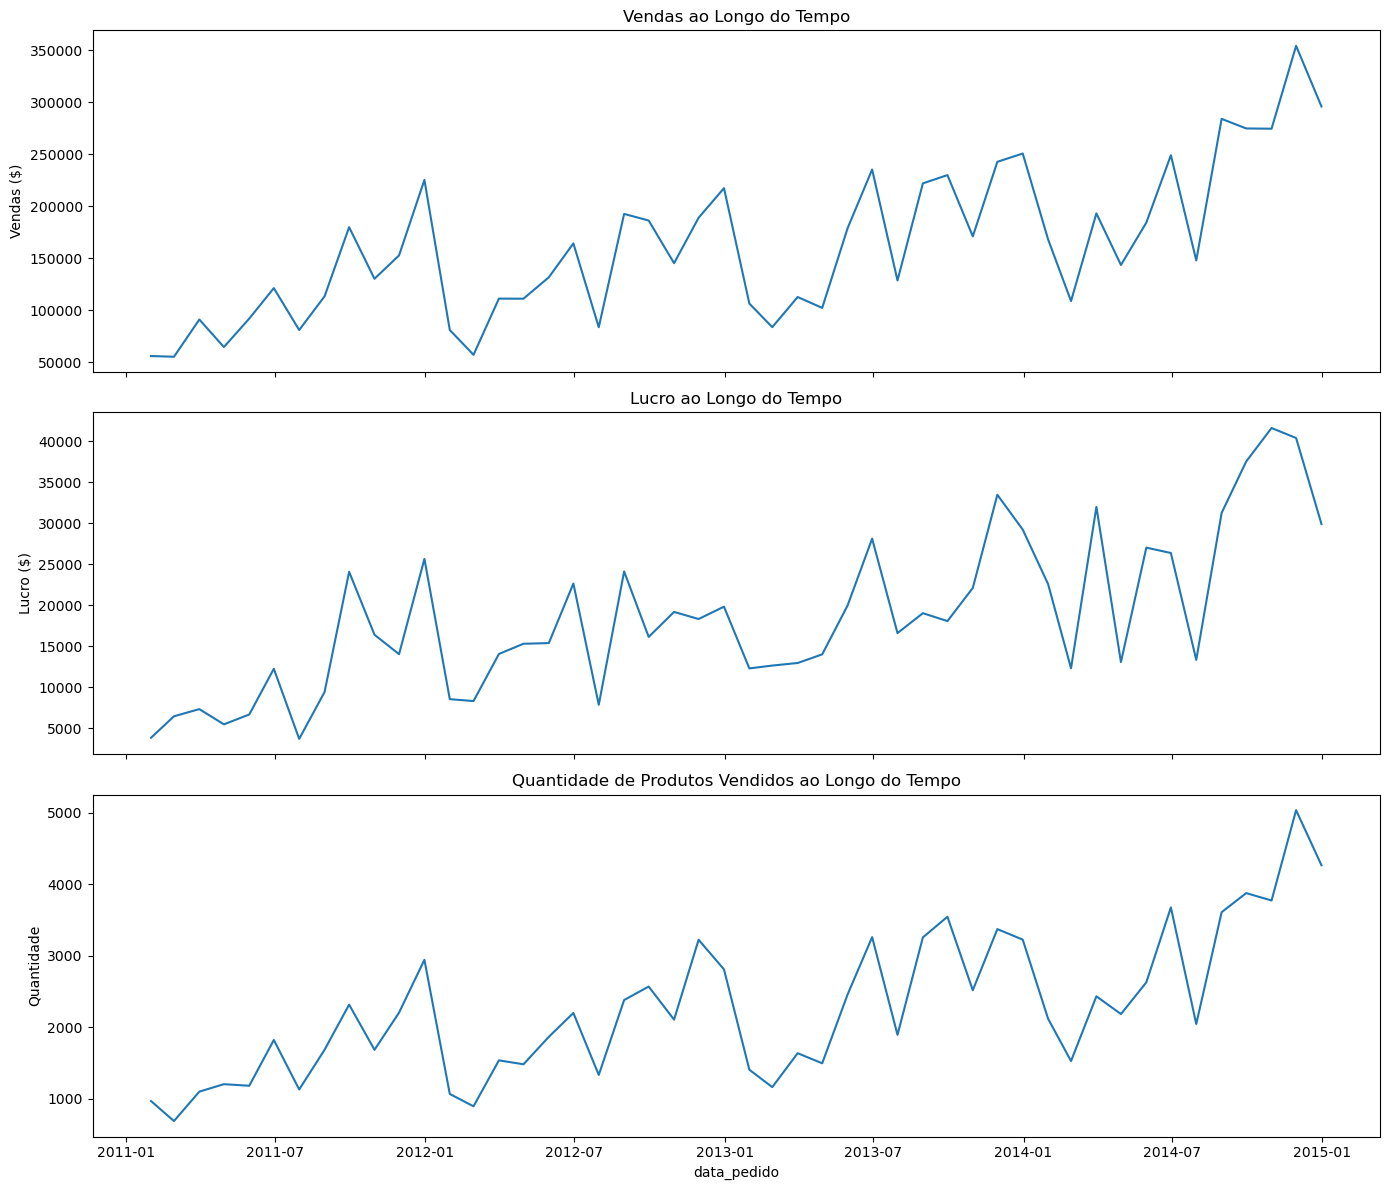

In [155]:
agregado_por_mes = df.resample('M', on='data_pedido').agg({'vendas': 'sum', 'lucro': 'sum', 'quantidade': 'sum'}).reset_index()

# Cria subplots para visualizar vendas, lucro e quantidade ao longo do tempo
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Gráfico de vendas ao longo do tempo
sns.lineplot(x='data_pedido', y='vendas', data=agregado_por_mes, ax=ax1)
ax1.set_title('Vendas ao Longo do Tempo')
ax1.set_ylabel('Vendas ($)')

# Gráfico de lucro ao longo do tempo
sns.lineplot(x='data_pedido', y='lucro', data=agregado_por_mes, ax=ax2)
ax2.set_title('Lucro ao Longo do Tempo')
ax2.set_ylabel('Lucro ($)')

# Gráfico de quantidade de produtos vendidos ao longo do tempo
sns.lineplot(x='data_pedido', y='quantidade', data=agregado_por_mes, ax=ax3)
ax3.set_title('Quantidade de Produtos Vendidos ao Longo do Tempo')
ax3.set_ylabel('Quantidade')

# Ajusta o layout para melhor visualização
plt.tight_layout()
plt.show()

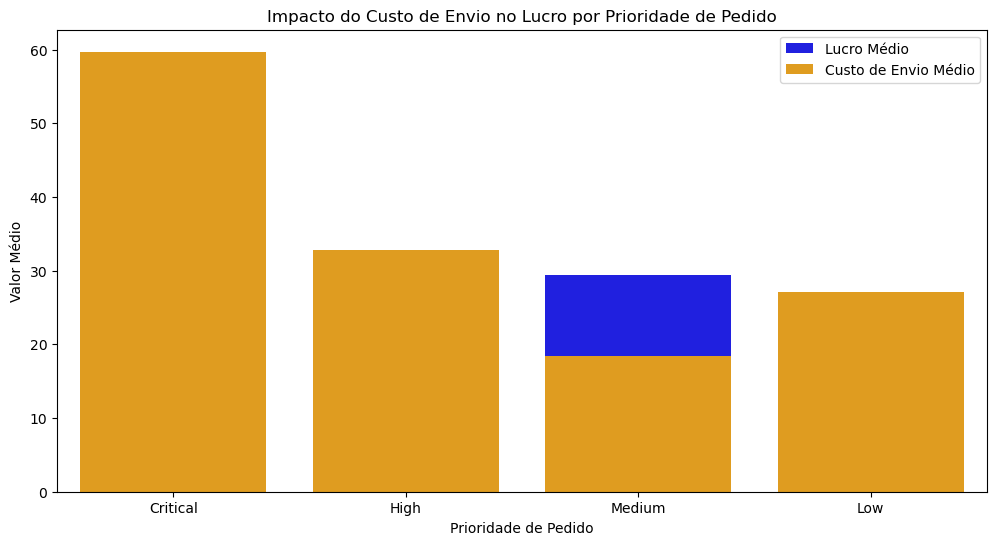

In [156]:
# Convertendo a coluna 'order_priority' para o tipo categórico para ordenação adequada
df['prioridade_pedido'] = pd.Categorical(df['prioridade_pedido'], categories=['Critical', 'High', 'Medium', 'Low'], ordered=True)

# Agrupando dados pela prioridade do pedido e calculando a média do lucro e do custo de envio
analise_prioridade = df.groupby('prioridade_pedido').agg({'lucro': 'mean', 'custo_envio': 'mean'}).reset_index()

# Criando um gráfico de barras para visualizar a análise
plt.figure(figsize=(12, 6))
sns.barplot(x='prioridade_pedido', y='lucro', data=analise_prioridade, color='blue', label='Lucro Médio')
sns.barplot(x='prioridade_pedido', y='custo_envio', data=analise_prioridade, color='orange', label='Custo de Envio Médio')

plt.title('Impacto do Custo de Envio no Lucro por Prioridade de Pedido')
plt.xlabel('Prioridade de Pedido')
plt.ylabel('Valor Médio')
plt.legend()
plt.show()


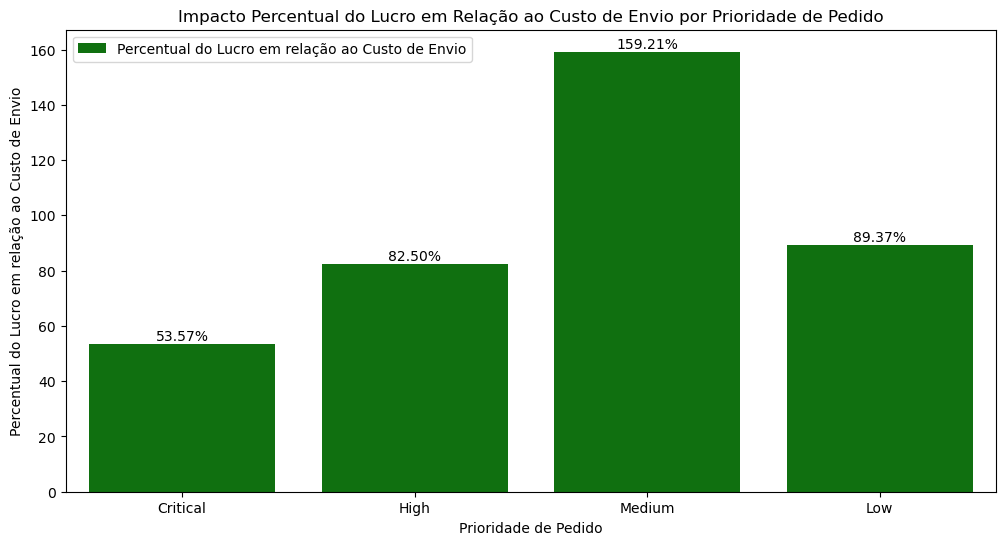

In [157]:
# Agrupando dados pela prioridade do pedido e calculando a média do lucro e do custo de envio
analise_prioridade = df.groupby('prioridade_pedido').agg({'lucro': 'mean', 'custo_envio': 'mean'}).reset_index()

# Calculando a porcentagem do lucro em relação ao custo de envio
analise_prioridade['percentual_lucro'] = (analise_prioridade['lucro'] / analise_prioridade['custo_envio']) * 100

# Criando um gráfico de barras para visualizar a análise em termos percentuais
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='prioridade_pedido', y='percentual_lucro', data=analise_prioridade, color='green', label='Percentual do Lucro em relação ao Custo de Envio')

# Adicionando os percentuais nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.title('Impacto Percentual do Lucro em Relação ao Custo de Envio por Prioridade de Pedido')
plt.xlabel('Prioridade de Pedido')
plt.ylabel('Percentual do Lucro em relação ao Custo de Envio')
plt.legend()
plt.show()


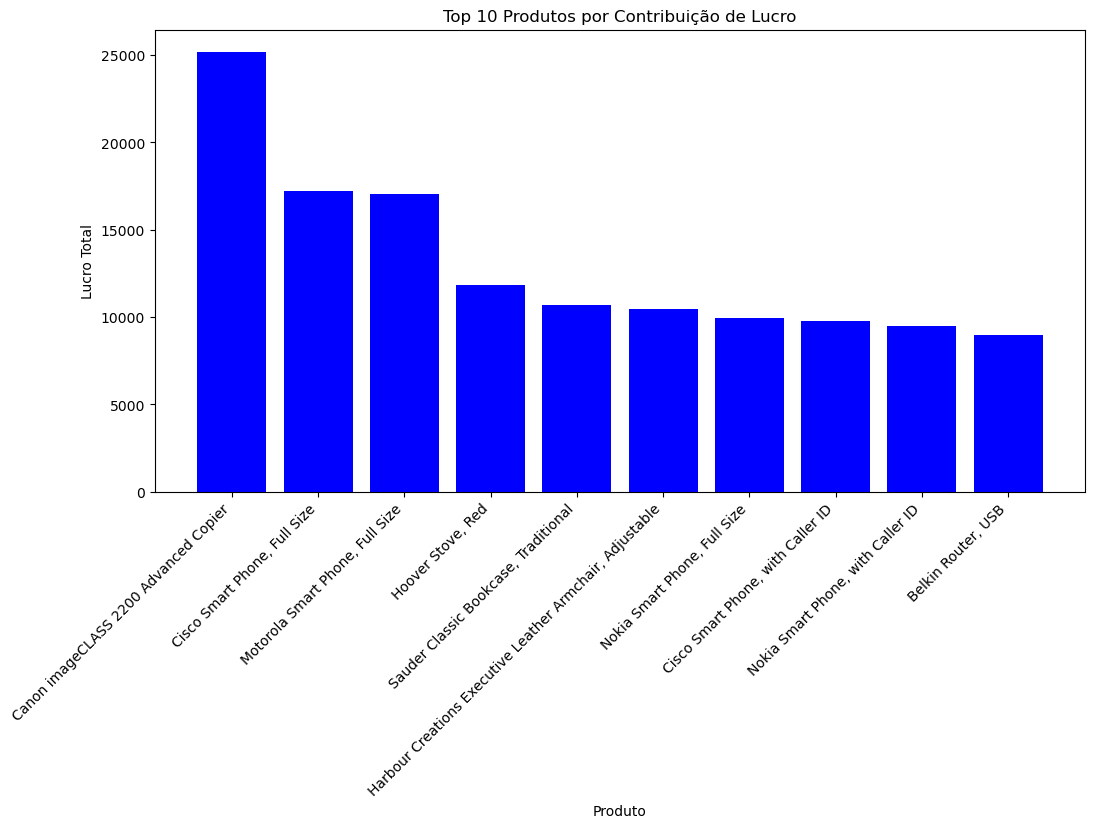

In [158]:
# Quais produtos ou categorias contribuem mais significativamente para o lucro total?

# Agrupando dados por produto e calculando o lucro total por produto
lucro_por_produto = df.groupby('nome_produto')['lucro'].sum().reset_index()

# Ordenando os produtos pelo lucro total em ordem decrescente
lucro_por_produto = lucro_por_produto.sort_values(by='lucro', ascending=False)

# Visualizando os 10 produtos que mais contribuem para o lucro total
top_10_produtos = lucro_por_produto.head(10)

# Criando um gráfico de barras para mostrar a contribuição de lucro por produto
plt.figure(figsize=(12, 6))
plt.bar(top_10_produtos['nome_produto'], top_10_produtos['lucro'], color='blue')
plt.title('Top 10 Produtos por Contribuição de Lucro')
plt.xlabel('Produto')
plt.ylabel('Lucro Total')
plt.xticks(rotation=45, ha='right')
plt.show()

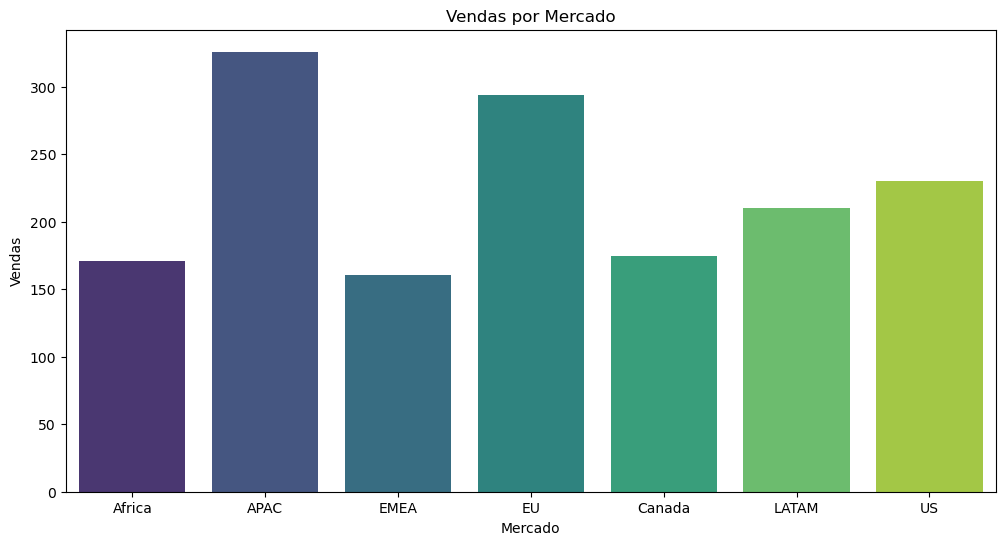

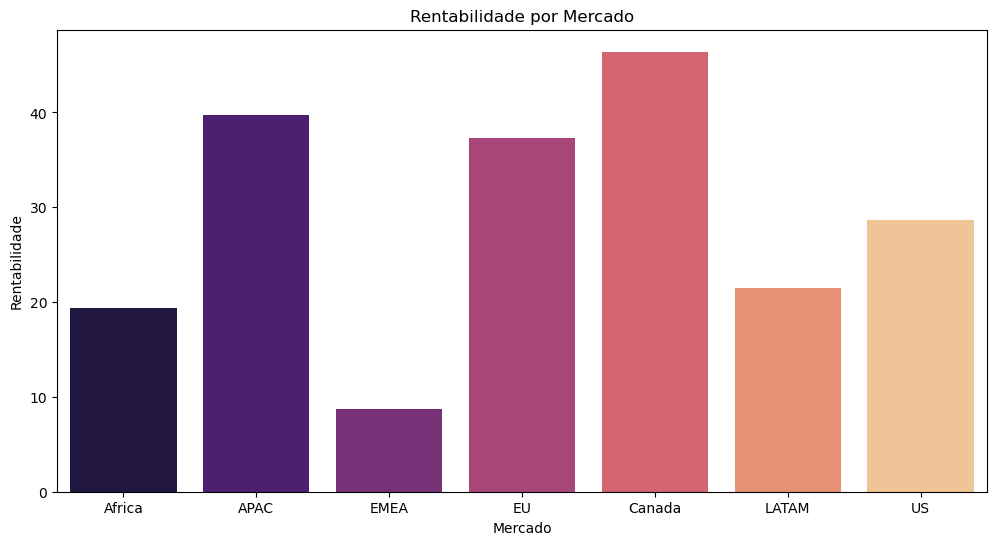

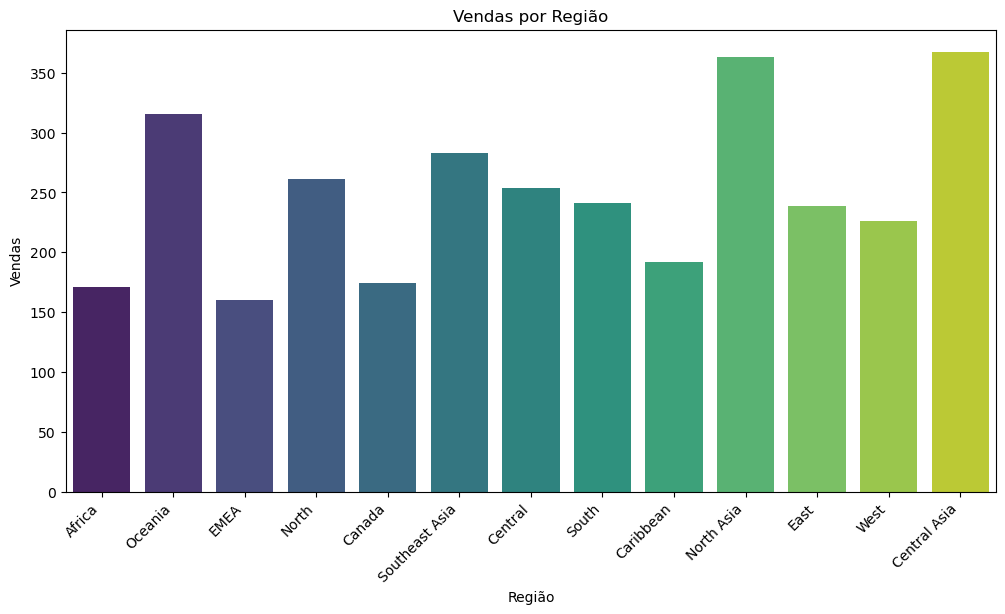

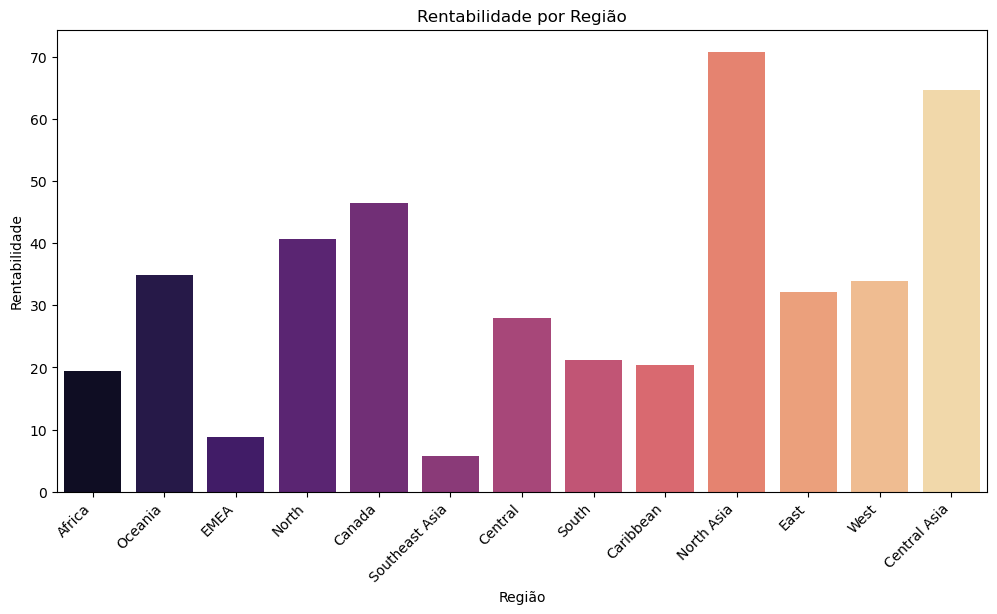

In [159]:
# Como as vendas e a rentabilidade variam em diferentes mercados e regiões?

# Criando um gráfico de barras para comparar vendas por mercado
plt.figure(figsize=(12, 6))
sns.barplot(x='mercado', y='vendas', data=df, ci=None, palette='viridis')

plt.title('Vendas por Mercado')
plt.xlabel('Mercado')
plt.ylabel('Vendas')
plt.show()

# Criando um gráfico de barras para comparar rentabilidade por mercado
plt.figure(figsize=(12, 6))
sns.barplot(x='mercado', y='lucro', data=df, ci=None, palette='magma')

plt.title('Rentabilidade por Mercado')
plt.xlabel('Mercado')
plt.ylabel('Rentabilidade')
plt.show()

# Criando um gráfico de barras para comparar vendas por região
plt.figure(figsize=(12, 6))
sns.barplot(x='região', y='vendas', data=df, ci=None, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Vendas')
plt.show()

# Criando um gráfico de barras para comparar rentabilidade por região
plt.figure(figsize=(12, 6))
sns.barplot(x='região', y='lucro', data=df, ci=None, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Rentabilidade por Região')
plt.xlabel('Região')
plt.ylabel('Rentabilidade')
plt.show()

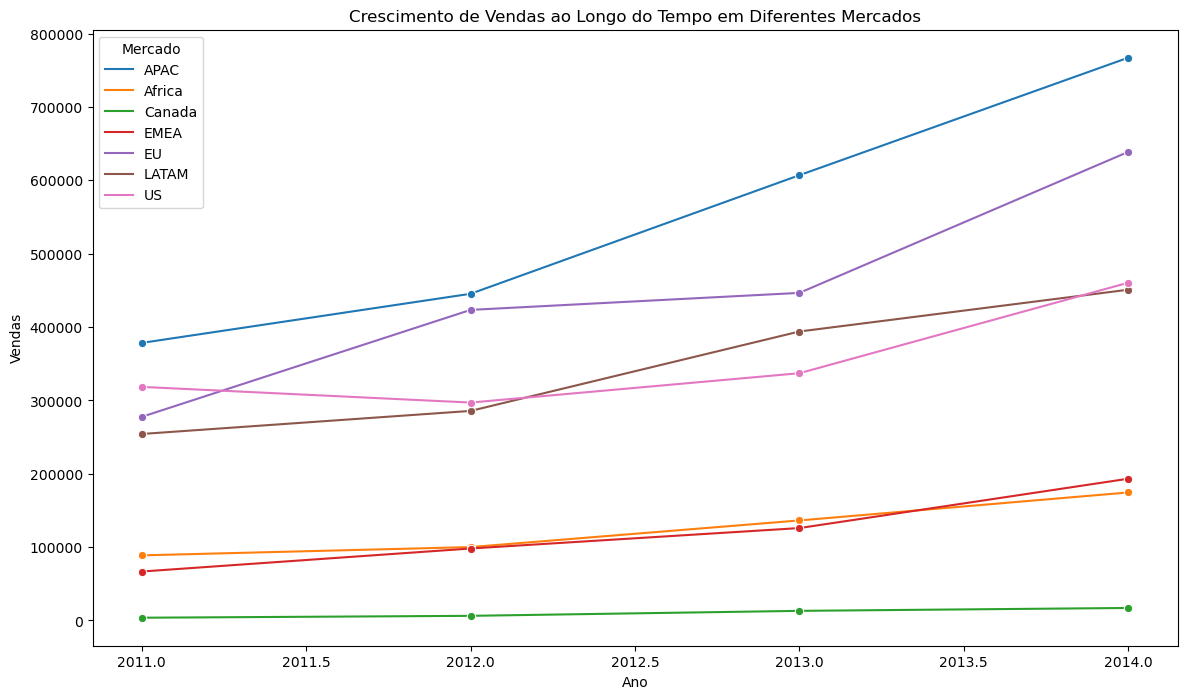

In [160]:
#  crescimento de vendas ao longo do tempo em diferentes mercados

df['data_envio'] = pd.to_datetime(df['data_envio'], errors='coerce', format='%d-%m-%Y')
df['data_envio'] = pd.to_datetime(df['data_envio'], errors='coerce', format='%m/%d/%Y')
# Agrupando dados por mercado e ano, somando as vendas
crescimento_vendas = df.groupby(['mercado', df['data_envio'].dt.year])['vendas'].sum().reset_index()
# Criando um gráfico de linha para visualizar o crescimento de vendas ao longo do tempo em diferentes mercados
plt.figure(figsize=(14, 8))
sns.lineplot(x='data_envio', y='vendas', hue='mercado', data=crescimento_vendas, marker='o')

plt.title('Crescimento de Vendas ao Longo do Tempo em Diferentes Mercados')
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.legend(title='Mercado', loc='upper left')
plt.show()

In [161]:
fig = px.line(crescimento_vendas, x='data_envio', y='vendas', color='mercado', markers=True,
              title='Crescimento de Vendas ao Longo do Tempo em Diferentes Mercados',
              labels={'data_envio': 'Ano', 'vendas': 'Vendas'},
              line_shape='linear')  # Pode ajustar para 'linear', 'spline', 'hv', 'vh', etc.

# Exibe o gráfico
fig.show()

In [162]:
df.groupby(['mercado', df['data_envio'].dt.year])['vendas'].sum().reset_index()

,mercado,data_envio,vendas
0,APAC,2011.0,378448.0
1,APAC,2012.0,445404.0
2,APAC,2013.0,607060.0
3,APAC,2014.0,767208.0
4,Africa,2011.0,88796.0
5,Africa,2012.0,100084.0
6,Africa,2013.0,136393.0
7,Africa,2014.0,174545.0
8,Canada,2011.0,3777.0
9,Canada,2012.0,6352.0


In [163]:

# Calculando a recência
ultima_compra = df['data_pedido'].max()
df['Recência'] = ultima_compra - df['data_pedido']
df['Recência'] = df['Recência'].dt.days  # Convertendo para dias

# Calculando a frequência
frequencia = df['nome_cliente'].value_counts().reset_index()
frequencia.columns = ['nome_cliente', 'Frequencia']
df = pd.merge(df, frequencia, on='nome_cliente', how='left')

# Calculando a monetarização
monetarizacao = df.groupby('nome_cliente')['vendas'].sum().reset_index()
monetarizacao.columns = ['nome_cliente', 'Monetário']
df = pd.merge(df, monetarizacao, on='nome_cliente', how='left')

# Visualizando a tabela resultante
print(df[['id_pedido', 'Recência', 'Frequencia', 'Monetário']])

             id_pedido  Recência  Frequencia  Monetário
0         AG-2011-2040       NaN          67    11699.0
1        IN-2011-47883       NaN          85    20939.0
2         HU-2011-1220       NaN          55    13385.0
3      IT-2011-3647632       NaN          94    23411.0
4        IN-2011-47883       NaN          85    20939.0
...                ...       ...         ...        ...
51285   CA-2014-115427       0.0          77    16119.0
51286     MO-2014-2560       0.0          71    16611.0
51287   MX-2014-110527       0.0          55    12827.0
51288   MX-2014-114783       0.0          58     7704.0
51289   CA-2014-156720       0.0          58    14181.0

[51290 rows x 4 columns]


In [164]:
# Visualizando a tabela resultante
df[['id_pedido', 'Recência', 'Frequencia', 'Monetário']]

,id_pedido,Recência,Frequencia,Monetário
0,AG-2011-2040,NaN,67,11699.0
1,IN-2011-47883,NaN,85,20939.0
2,HU-2011-1220,NaN,55,13385.0
3,IT-2011-3647632,NaN,94,23411.0
4,IN-2011-47883,NaN,85,20939.0
...,...,...,...,...
51285,CA-2014-115427,0.0,77,16119.0
51286,MO-2014-2560,0.0,71,16611.0
51287,MX-2014-110527,0.0,55,12827.0
51288,MX-2014-114783,0.0,58,7704.0


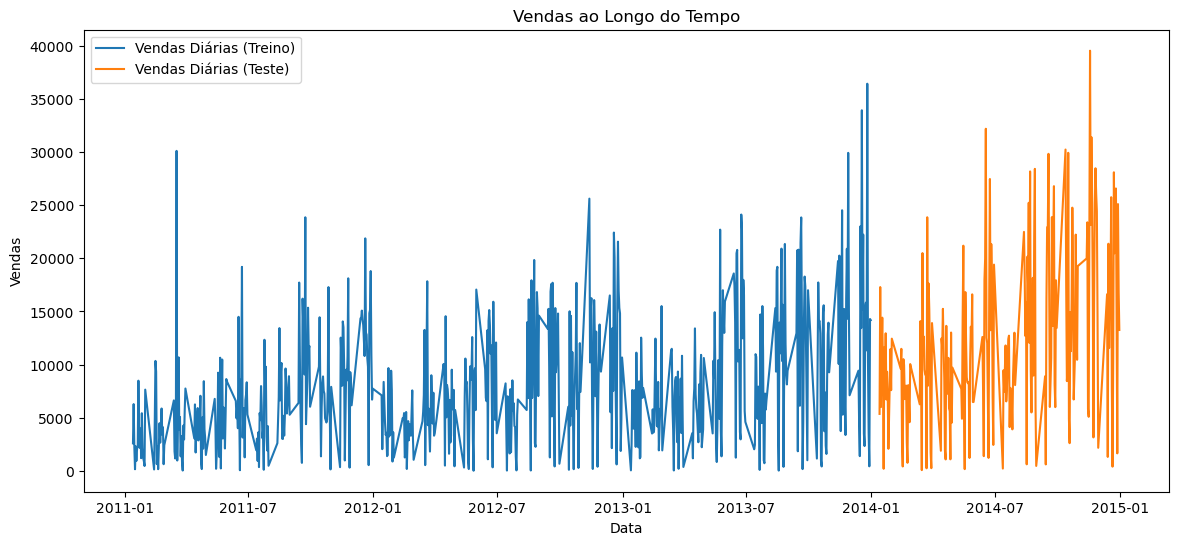

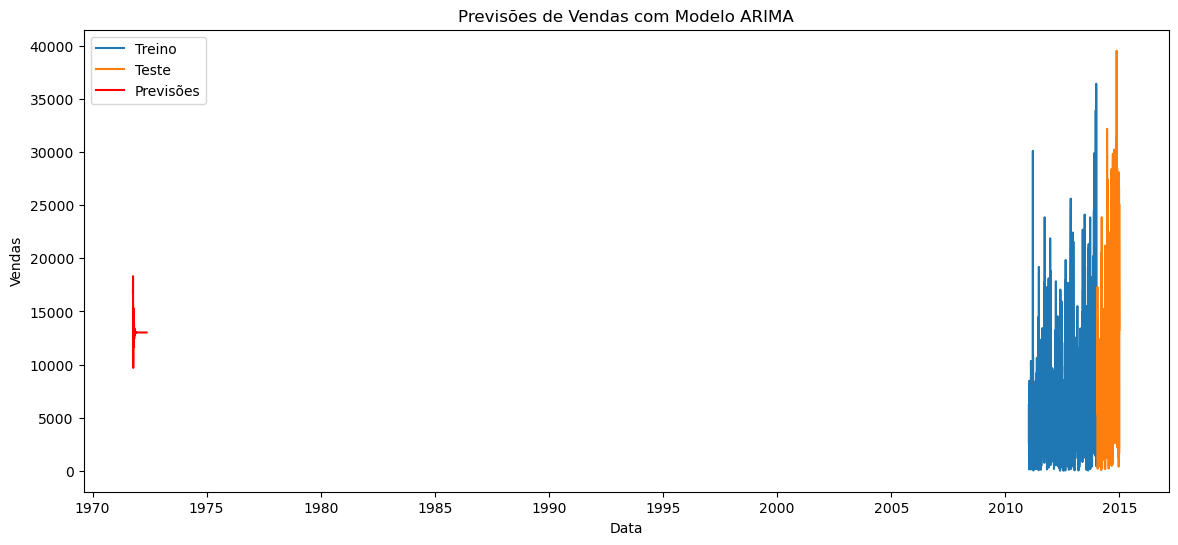

In [165]:
from statsmodels.tsa.arima.model import ARIMA

df = df.copy()


# Removendo linhas com data_pedido nula
df = df.dropna(subset=['data_pedido'])

# Convertendo 'data_pedido' para datetime
df['data_pedido'] = pd.to_datetime(df['data_pedido'])

# Filtrando dados de treino (2011 a 2013) e teste (2014 e 2015)
dados_treino = df[(df['data_pedido'].dt.year >= 2011) & (df['data_pedido'].dt.year <= 2013)]
dados_teste = df[(df['data_pedido'].dt.year >= 2014) & (df['data_pedido'].dt.year <= 2015)]

# Agrupando vendas por data
vendas_diarias_treino = dados_treino.groupby('data_pedido')['vendas'].sum().reset_index()
vendas_diarias_teste = dados_teste.groupby('data_pedido')['vendas'].sum().reset_index()

# Definindo a data como índice
vendas_diarias_treino.set_index('data_pedido', inplace=True)
vendas_diarias_teste.set_index('data_pedido', inplace=True)

# Visualizando as vendas ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(vendas_diarias_treino, label='Vendas Diárias (Treino)')
plt.plot(vendas_diarias_teste, label='Vendas Diárias (Teste)')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.show()

# Criando e treinando o modelo ARIMA
modelo_arima = ARIMA(vendas_diarias_treino, order=(5, 1, 2))  # Ajuste os parâmetros conforme necessário
modelo_treinado = modelo_arima.fit()

# Fazendo previsões no conjunto de teste
previsoes = modelo_treinado.predict(start=len(vendas_diarias_treino), end=len(vendas_diarias_treino) + len(vendas_diarias_teste) - 1, typ='levels')

# Visualizando as previsões
plt.figure(figsize=(14, 6))
plt.plot(vendas_diarias_treino, label='Treino')
plt.plot(vendas_diarias_teste, label='Teste')
plt.plot(previsoes, label='Previsões', color='red')
plt.title('Previsões de Vendas com Modelo ARIMA')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [166]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(vendas_diarias_teste, previsoes))
print(f"Erro Quadrático Médio da Raiz (RMSE): {rmse}")

Erro Quadrático Médio da Raiz (RMSE): 7934.372656950302


In [167]:
df.to_csv('arquivo_final.csv')